In [1]:
#start
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

In [2]:
#import the dataset and convert to dataframe
df = pd.read_csv('Train_HR_Employee_Attrition.csv') 
df_original = df.copy() #for backup and comparison

In [3]:
#enable full view of pandas dataframes
pd.set_option('display.max_columns', None)

In [4]:
#show dataframe
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,88,3,3,Research Director,3,Single,8446.0,13782,9,NaN,No,17,3.0,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,52,3,5,Manager,3,Divorced,4834.0,8213,1,NaN,Yes,14,3.0,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,36,3,2,Sales Executive,4,Divorced,4768.0,16130,1,Y,Yes,25,3.0,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,65,3,1,Research Scientist,2,Single,2799.0,17674,2,Y,No,14,3.0,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,7978.0,6319,1,NaN,No,12,3.0,3,80.0,0,2,NaN,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,96,4,1,Laboratory Technician,4,Divorced,2115.0,7324,1,Y,Yes,13,3.0,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,76,1,2,Sales Executive,3,Married,5147.0,20739,4,Y,Yes,18,3.0,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,NaN,583,Sales,4,1,Marketing,3,Male,87,2,2,Sales Executive,1,Married,2500.0,18154,1,NaN,No,12,NaN,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,99,3,2,Sales Executive,2,Single,4385.0,20763,3,NaN,Yes,16,3.0,4,80.0,0,15,2.0,3,10.0,4,0,1


In [ ]:
#show types of values
df.dtypes

In [ ]:
#check for empty values
df.isna().sum()

<AxesSubplot:>

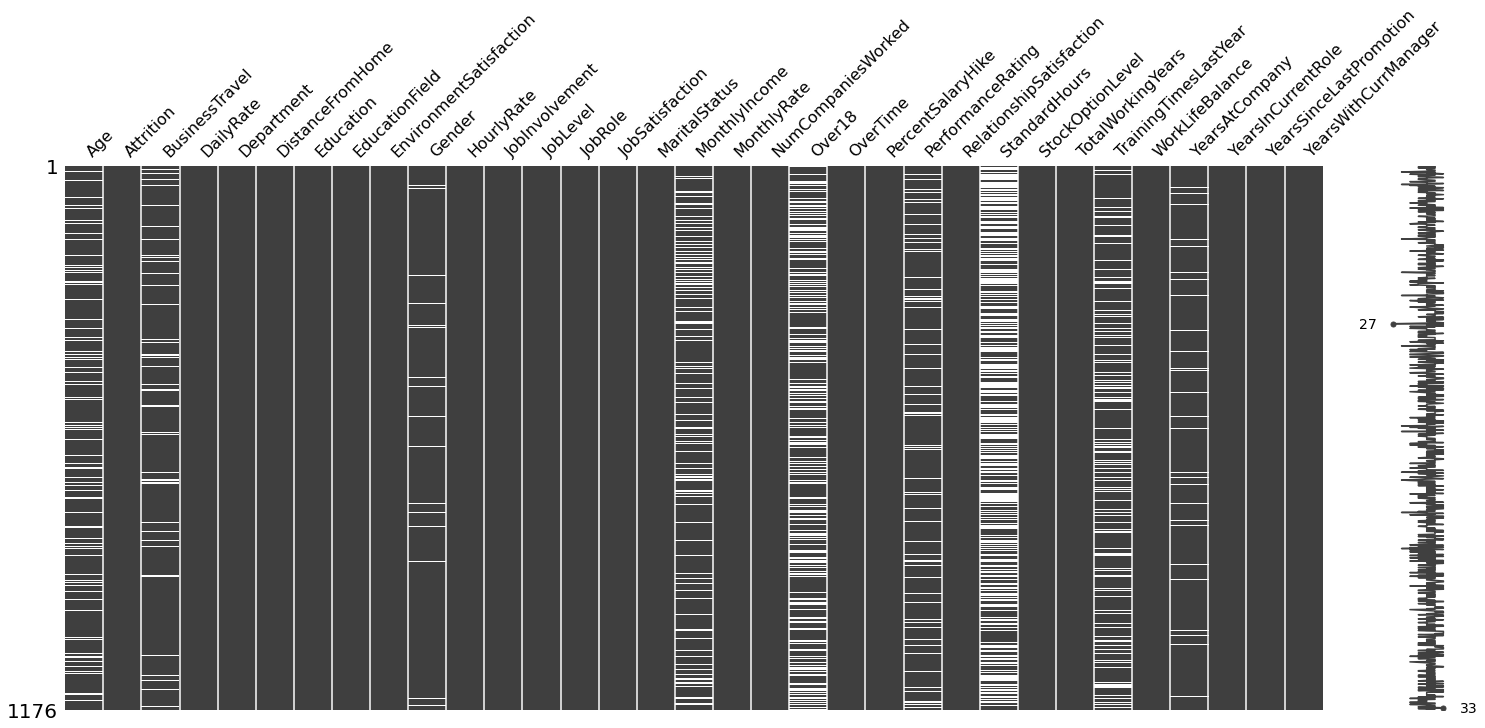

In [7]:
#show missing values
import missingno as msno
msno.matrix(df)


<AxesSubplot:>

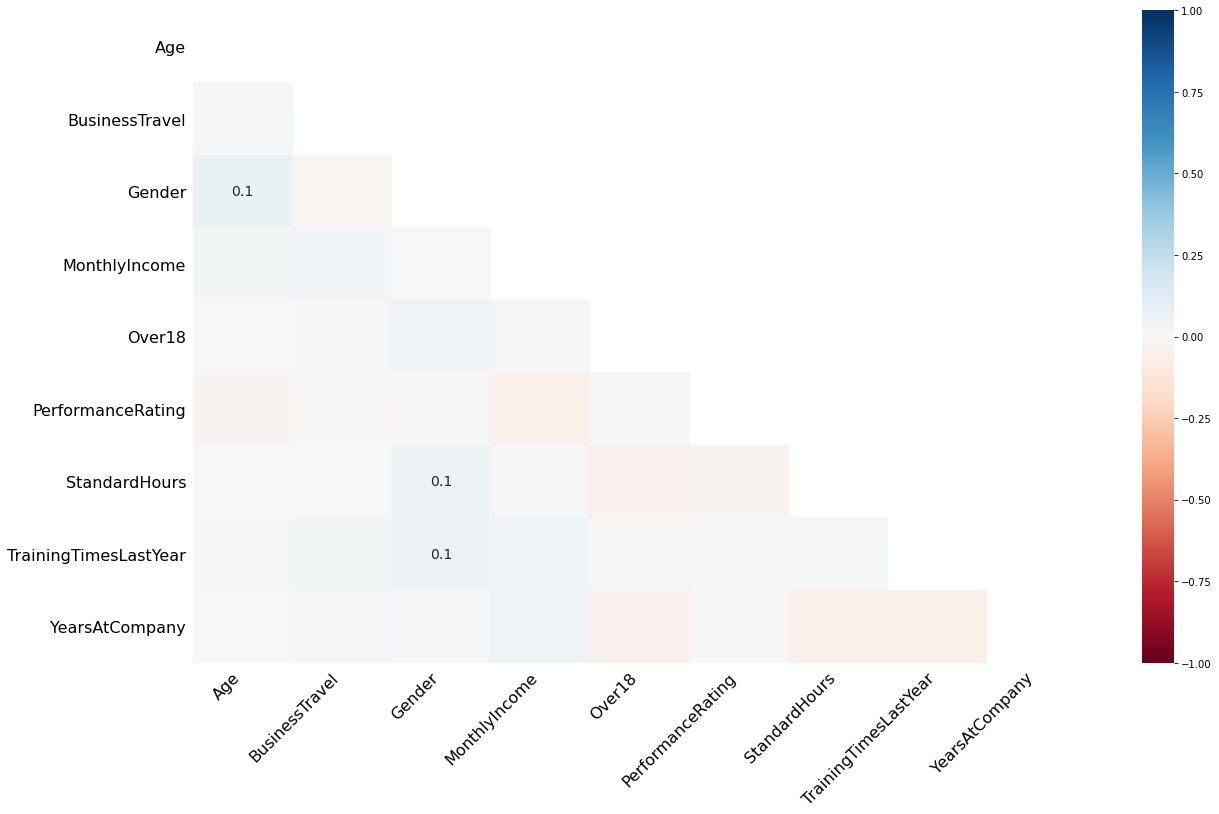

In [8]:
#check for relationship among missing data (does one missing data triggers another)
msno.heatmap(df)


In [9]:
#show summary statistics of numeric variables
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,1176.000000,1176.000000,1176.000000,1038.000000,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,14395.836735,2.663265,15.176871,3.152216,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,7111.845106,2.491287,3.623941,0.359403,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,8227.250000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,14434.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,20489.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1176,1069,1176,1176,1117,1176,1176,804,1176
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,984,764,769,489,664,261,542,804,838


In [9]:
cat_list = list(df.describe(include='object'))
cat_list.extend(['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'])
cat_list

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [10]:
df_cat = df.loc[:,cat_list].copy()
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Single,NaN,No,4,2,3,3,3,3.0,3,0,2
1,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manager,Divorced,NaN,Yes,1,2,3,5,3,3.0,3,1,3
2,No,Travel_Frequently,Sales,Life Sciences,NaN,Sales Executive,Divorced,Y,Yes,3,3,3,2,4,3.0,3,1,3
3,No,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Single,Y,No,4,2,3,1,2,3.0,2,0,3
4,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,NaN,No,2,3,3,1,4,3.0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Divorced,Y,Yes,2,4,4,1,4,3.0,2,2,2
1172,Yes,Non-Travel,Sales,Life Sciences,Female,Sales Executive,Married,Y,Yes,4,2,1,2,3,3.0,2,0,2
1173,No,NaN,Sales,Marketing,Male,Sales Executive,Married,NaN,No,1,3,2,2,1,NaN,1,0,4
1174,No,Non-Travel,Sales,Marketing,Male,Sales Executive,Single,NaN,Yes,4,1,3,2,2,3.0,4,0,3


In [13]:
#Show details of categorical attributes
for column in list(df_cat):
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print("_________________________________________________________________")

Attrition : ['No' 'Yes']
No     984
Yes    192
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']
Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    769
Sales                     361
Human Resources            46
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Medical' 'Life Sciences' 'Technical Degree' 'Other' 'Human Resources'
 'Marketing']
Life Sciences       489
Medical             370
Marketing           125
Technical Degree    107
Other                64
Human Resources      21
Name: EducationField, dtype: int64
_________________________________________________________________
Gender :

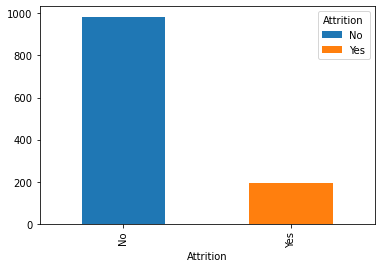

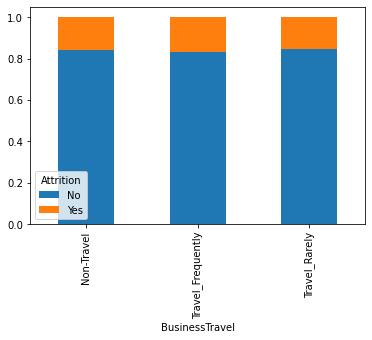

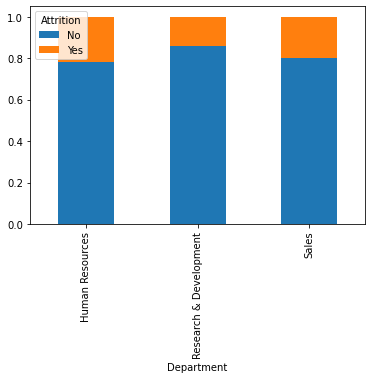

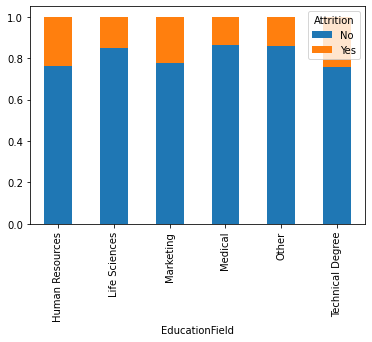

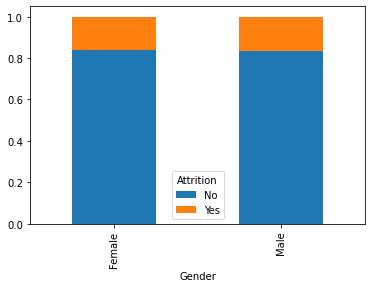

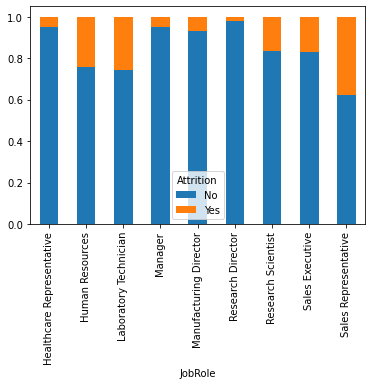

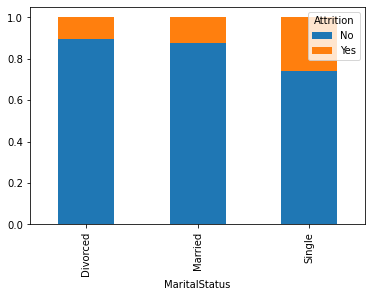

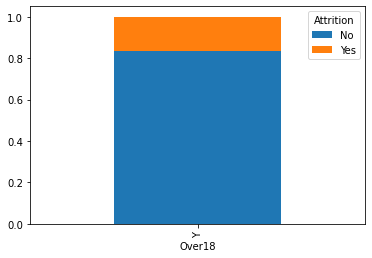

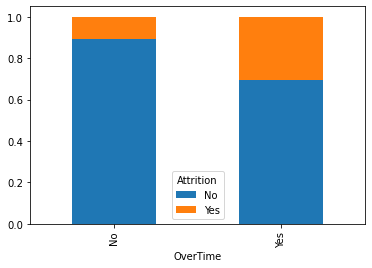

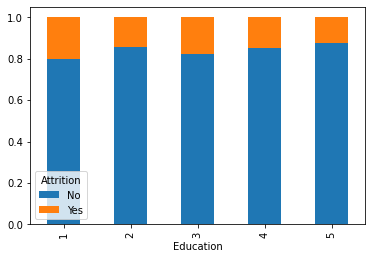

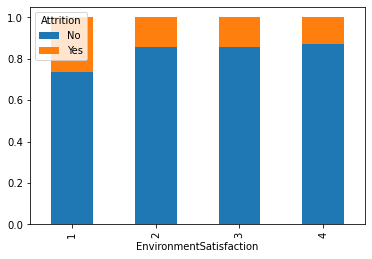

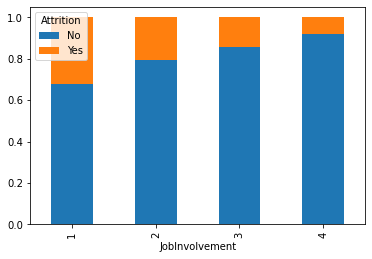

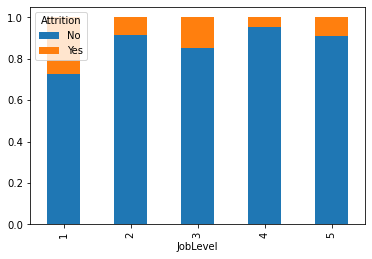

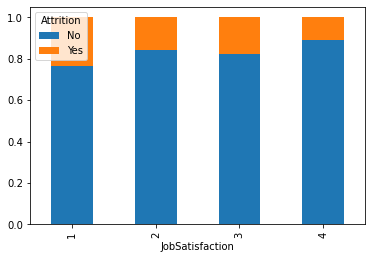

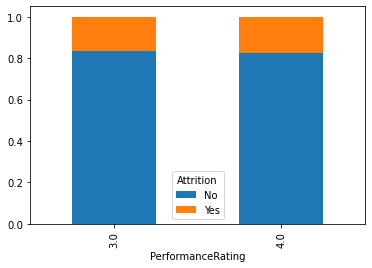

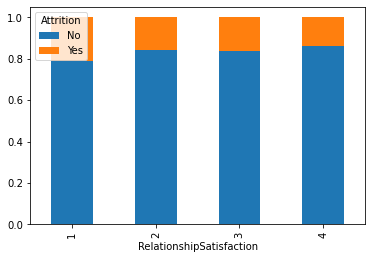

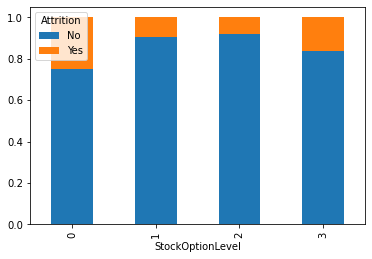

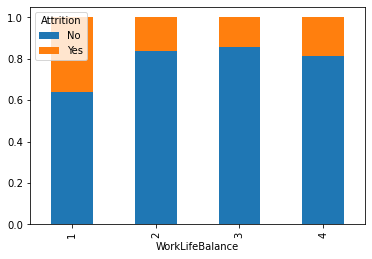

In [14]:
#Describe categorical variable (univariate & multivariate)
target_variable = 'Attrition'
for _ in list(df_cat):
    ct = pd.crosstab(df.loc[:,_],df.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

In [12]:
df_num = df[[col for col in list(df) if col not in list(df_cat)]].copy()
df_num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,593,9,88,8446.0,13782,9,17,80.0,20,2.0,8.0,7,2,13
1,36.0,1218,1,52,4834.0,8213,1,14,80.0,21,3.0,1.0,8,1,6
2,NaN,530,16,36,4768.0,16130,1,25,NaN,7,4.0,1.0,5,1,2
3,33.0,953,5,65,2799.0,17674,2,14,NaN,12,1.0,3.0,7,0,7
4,NaN,1380,9,75,7978.0,6319,1,12,80.0,2,NaN,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,1123,16,96,2115.0,7324,1,13,80.0,1,3.0,17.0,0,0,0
1172,33.0,249,6,76,5147.0,20739,4,18,80.0,12,2.0,11.0,7,7,7
1173,33.0,583,4,87,2500.0,18154,1,12,80.0,5,2.0,3.0,2,0,3
1174,45.0,1174,3,99,4385.0,20763,3,16,80.0,15,2.0,10.0,4,0,1


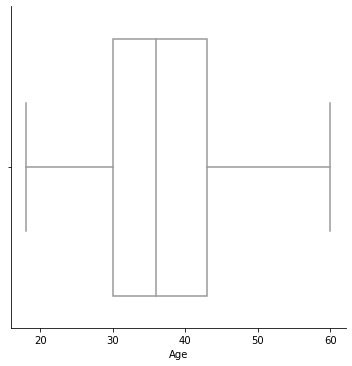

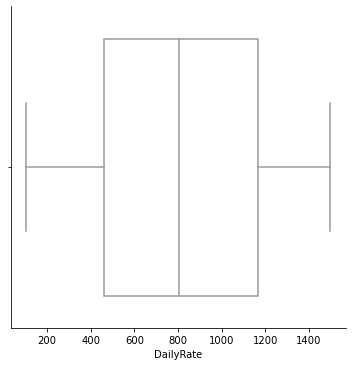

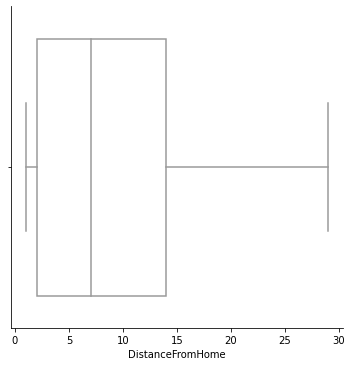

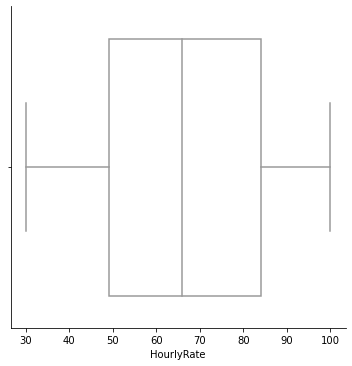

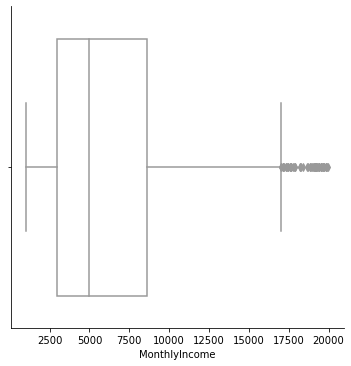

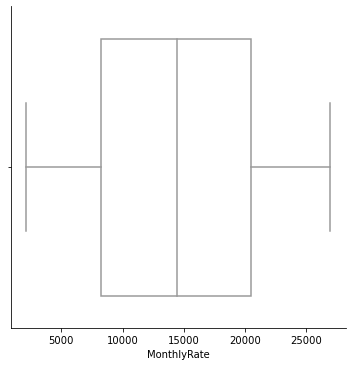

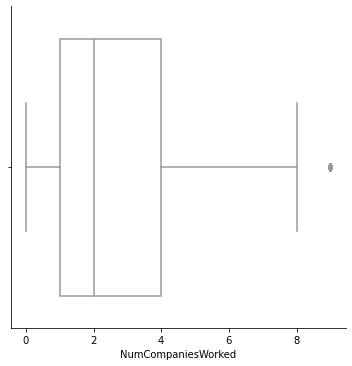

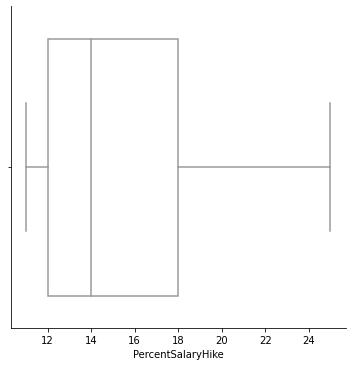

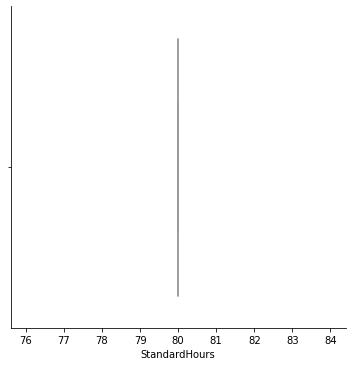

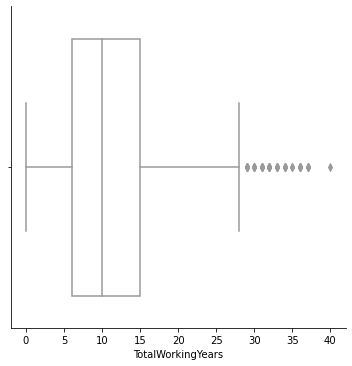

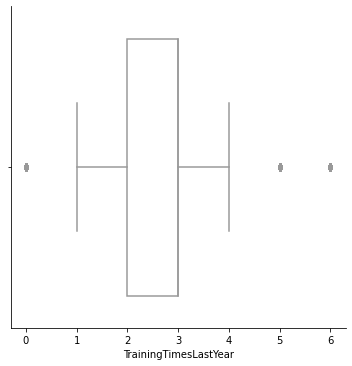

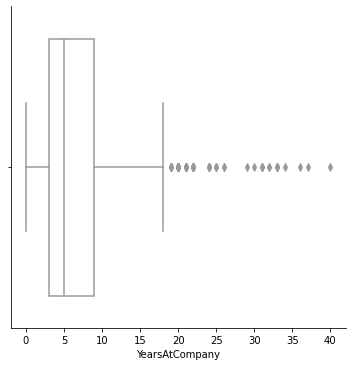

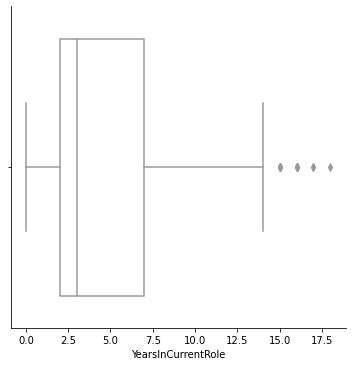

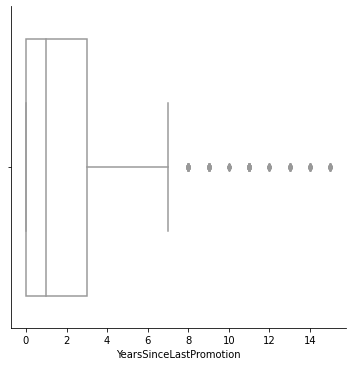

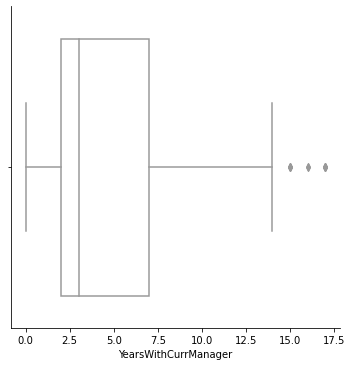

In [13]:
for i in df_num:
    sns.catplot(x = i, data = df, kind='box', color='white')

<AxesSubplot:>

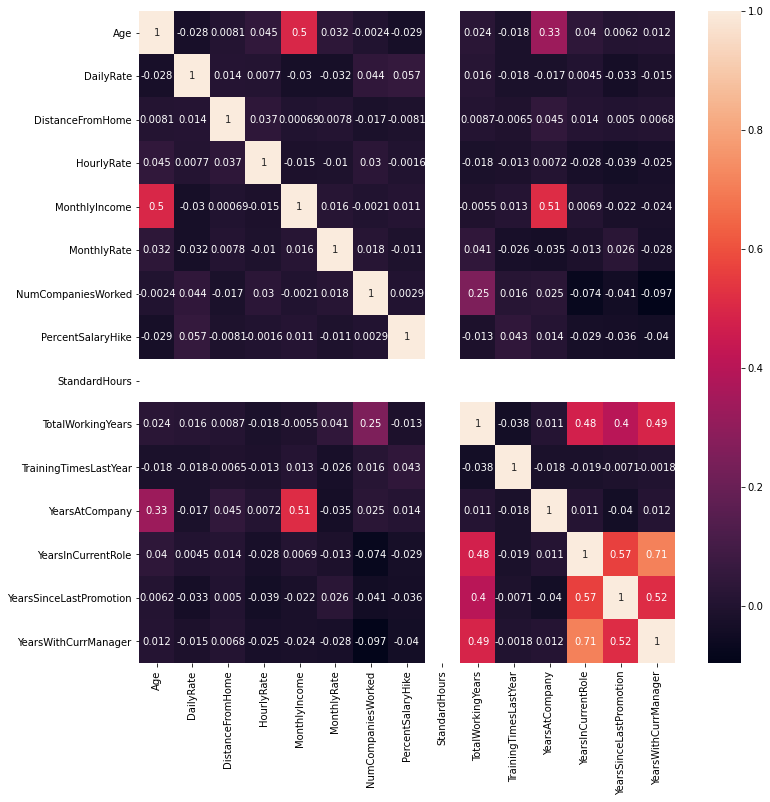

In [24]:
fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(data = df_num.corr(), annot=True, ax=ax)

In [25]:
#imputing Gender

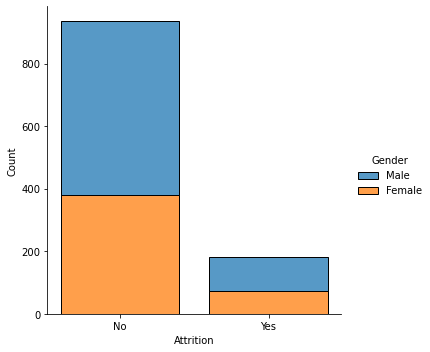

In [26]:
sns.displot(x='Attrition',data=df,hue='Gender', multiple = 'stack', shrink=.8)

In [27]:
pd.crosstab(df.Attrition,df.Gender)

Gender,Female,Male
Attrition,,
No,381,555
Yes,72,109


<AxesSubplot:xlabel='Attrition'>

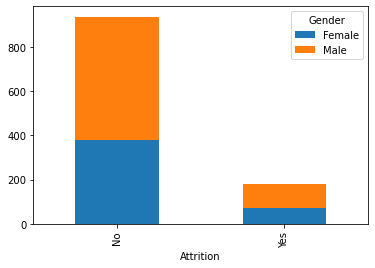

In [28]:
pd.crosstab(df.Attrition,df.Gender).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

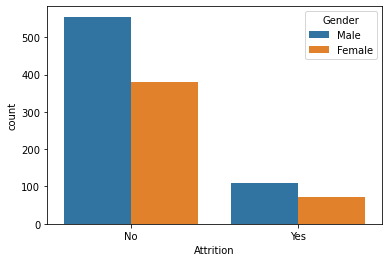

In [29]:
sns.countplot(x='Attrition',data=df,hue='Gender')

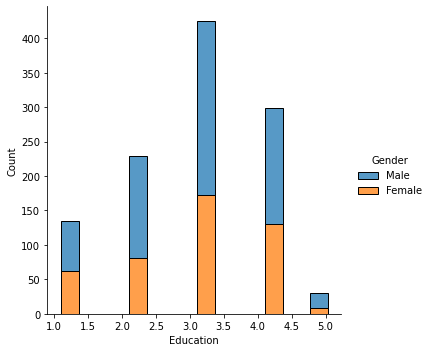

In [36]:
sns.displot(x = 'Education',hue='Gender',data = df, multiple='stack', shrink=0.8)

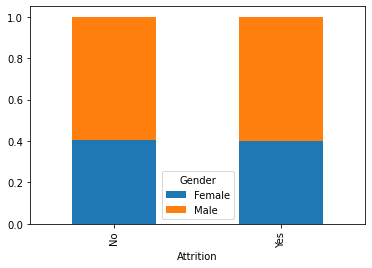

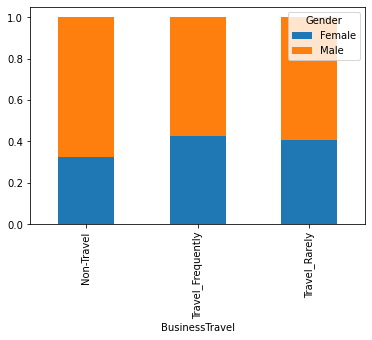

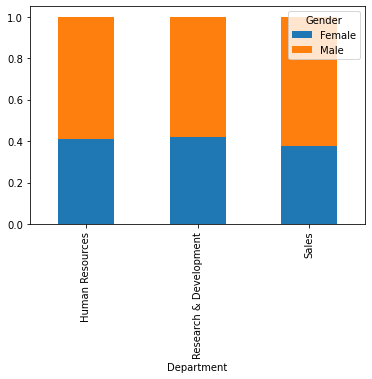

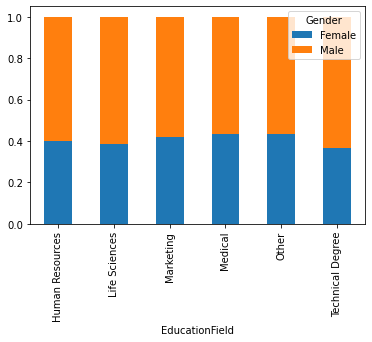

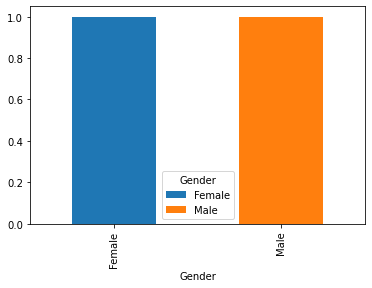

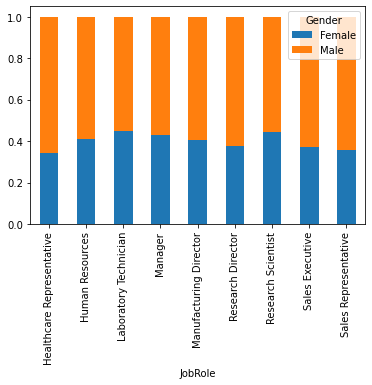

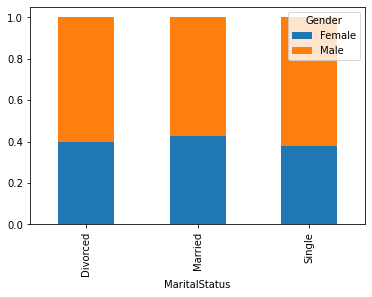

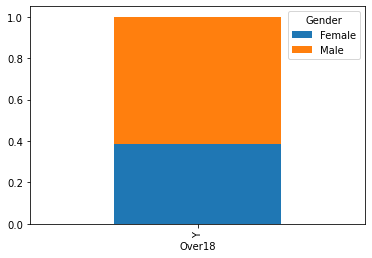

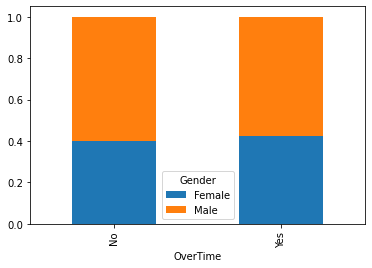

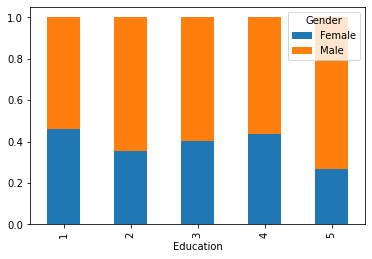

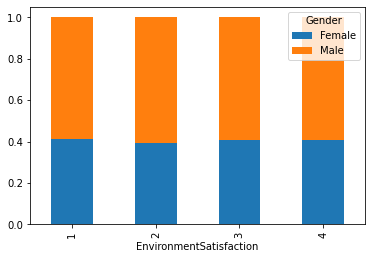

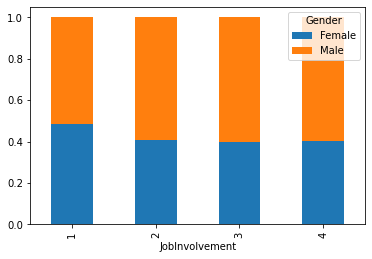

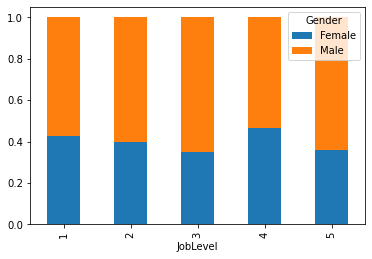

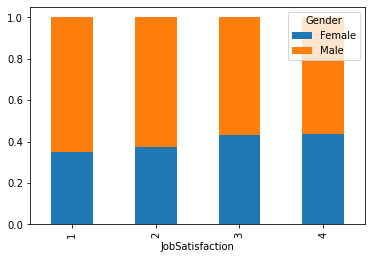

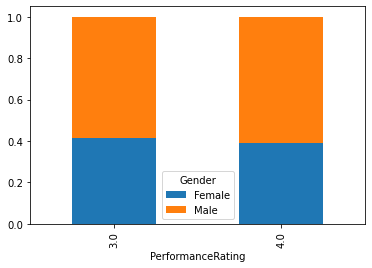

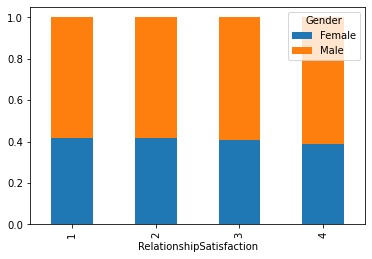

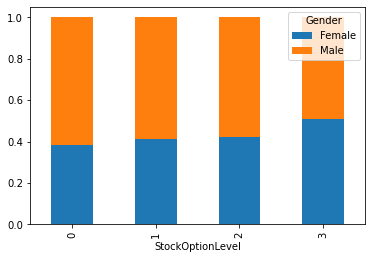

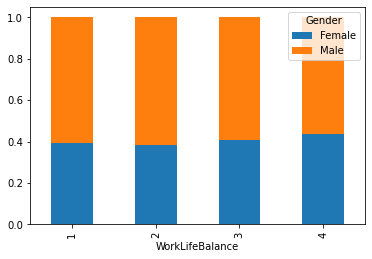

In [35]:
for _ in list(df_cat):
    ct = pd.crosstab(df.loc[:,_],df.Gender)
    BusinessTravel_pc  = ct.div(ct.sum(1).astype(float), axis=0)
    BusinessTravel_pc.plot(kind='bar',stacked = True)

<AxesSubplot:>

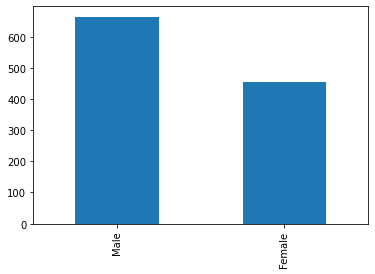

In [37]:
df.Gender.value_counts().plot(kind='bar')

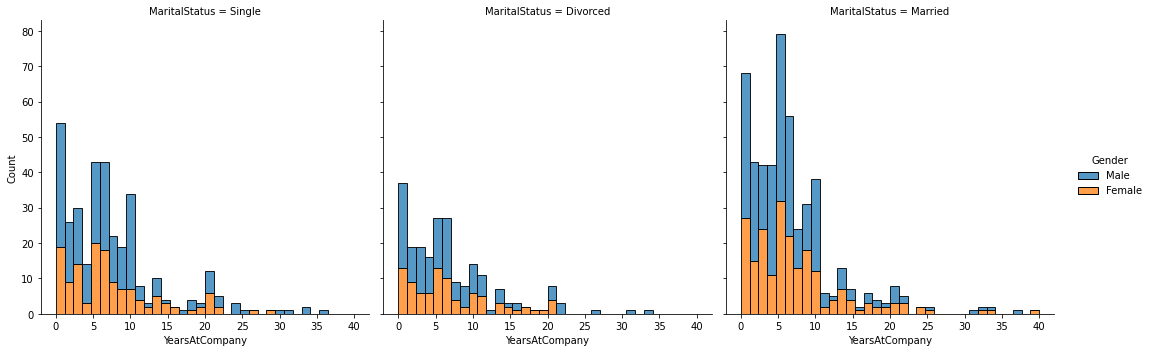

In [38]:
sns.displot(x='YearsAtCompany',hue='Gender',data=df,col='MaritalStatus' ,multiple='stack')

In [39]:
df[df.Gender.isnull()].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,36,3,2,Sales Executive,4,Divorced,4768.0,16130,1,Y,Yes,25,3.0,3,NaN,1,7,4.0,3,1.0,5,1,2
8,42.0,No,Travel_Rarely,145,Sales,1,3,Life Sciences,4,NaN,95,3,2,Sales Executive,3,Married,5410.0,24920,0,Y,No,12,3.0,1,NaN,1,19,3.0,3,4.0,7,0,13
13,30.0,Yes,Travel_Rarely,1093,Sales,9,3,Life Sciences,3,NaN,82,1,4,Sales Executive,3,Married,2693.0,24164,7,NaN,No,11,NaN,3,NaN,0,25,NaN,1,1.0,5,14,10
15,28.0,No,Travel_Rarely,1465,Research & Development,1,3,Medical,4,NaN,63,3,1,Research Scientist,2,Married,3310.0,9369,0,NaN,Yes,21,4.0,1,80.0,1,12,3.0,3,5.0,9,5,7
42,45.0,Yes,NaN,360,Research & Development,23,3,Medical,3,NaN,93,3,1,Research Scientist,1,Single,16704.0,22154,0,NaN,No,13,3.0,1,NaN,0,6,2.0,3,21.0,2,0,3


In [40]:
df.groupby(['JobRole','MaritalStatus'])['Gender'].agg(pd.Series.mode)

JobRole                    MaritalStatus
Healthcare Representative  Divorced                   Male
                           Married                    Male
                           Single                     Male
Human Resources            Divorced                   Male
                           Married                    Male
                           Single           [Female, Male]
Laboratory Technician      Divorced                   Male
                           Married                    Male
                           Single                     Male
Manager                    Divorced                 Female
                           Married                    Male
                           Single                     Male
Manufacturing Director     Divorced                   Male
                           Married                    Male
                           Single                     Male
Research Director          Divorced                 Female
               

In [41]:
"""SCRIPT"""

df.Gender = df.groupby(['JobRole','MaritalStatus'])['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [42]:
df.Gender.isnull().sum()

0

In [43]:
df.Gender.value_counts(normalize=True)

Male      0.612245
Female    0.387755
Name: Gender, dtype: float64

In [44]:
df_original.Gender.value_counts(normalize=True)

Male      0.594449
Female    0.405551
Name: Gender, dtype: float64

In [45]:
#cleaning YearsAtCompany

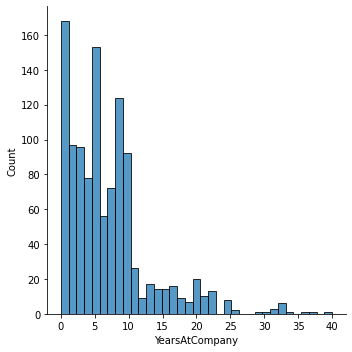

In [46]:
sns.displot(x='YearsAtCompany',data=df)

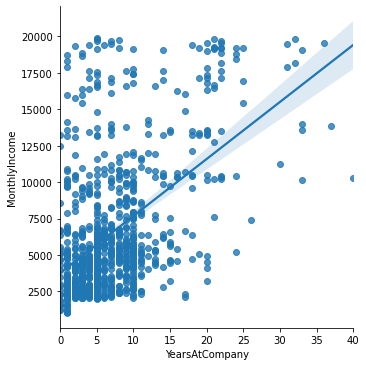

In [47]:
sns.lmplot(x='YearsAtCompany', y='MonthlyIncome', data=df)

In [53]:
stats.linregress(df_temp['YearsAtCompany'],df_temp['MonthlyIncome'])

LinregressResult(slope=418.84493768540113, intercept=3604.5629765673198, rvalue=0.5518516165769668, pvalue=1.5585108801110177e-14, stderr=49.57619176448425)

In [50]:
df.groupby(['JobRole','Gender','MaritalStatus'])['YearsAtCompany'].mean()

JobRole                    Gender  MaritalStatus
Healthcare Representative  Female  Divorced          5.500000
                                   Married           5.923077
                                   Single            5.900000
                           Male    Divorced          4.357143
                                   Married           6.794118
                                   Single            5.300000
Human Resources            Female  Divorced         15.333333
                                   Married           5.777778
                                   Single            9.600000
                           Male    Divorced          7.000000
                                   Married           8.153846
                                   Single            5.500000
Laboratory Technician      Female  Divorced          5.066667
                                   Married           7.674419
                                   Single            6.896552
                     

In [54]:
"""SCRIPT"""

df.YearsAtCompany = df.groupby(['JobRole','Gender','MaritalStatus'])['YearsAtCompany'].apply(lambda x: x.fillna(x.mean()))

In [55]:
df.YearsAtCompany.isnull().sum()

0

In [56]:
df.YearsAtCompany.describe()

count    1176.000000
mean        6.924068
std         5.914107
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [57]:
df_original.YearsAtCompany.describe()

count    1116.000000
mean        6.926523
std         6.063193
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [58]:
#cleaning BusinessTravel

<AxesSubplot:>

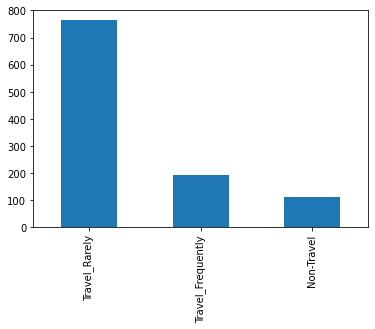

In [59]:
df.BusinessTravel.value_counts().plot(kind='bar')

In [60]:
df.BusinessTravel.isnull().sum()

107

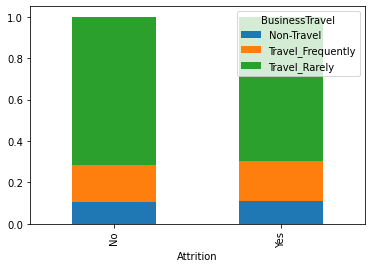

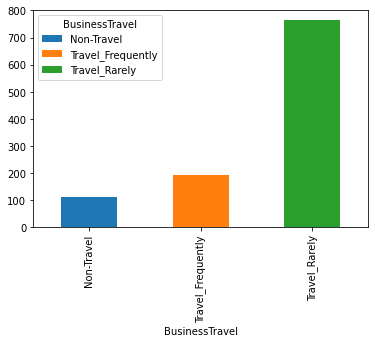

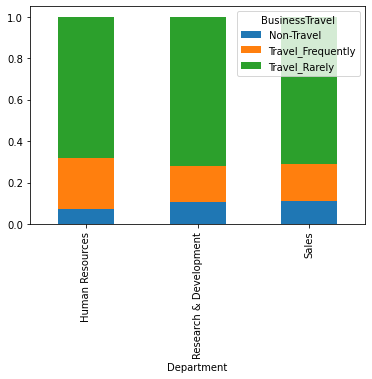

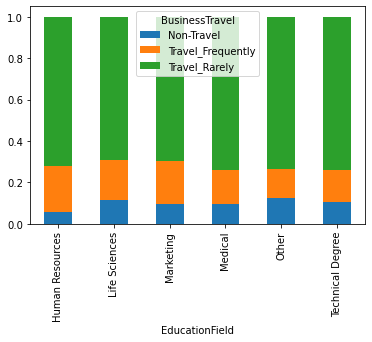

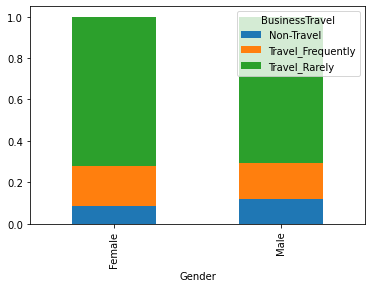

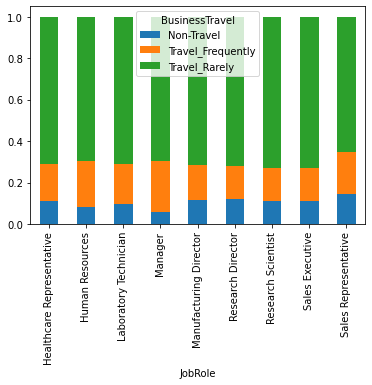

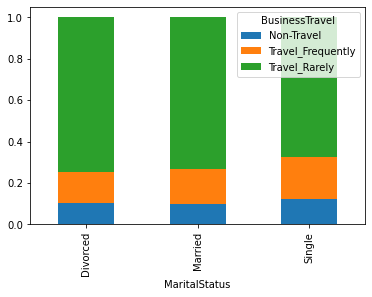

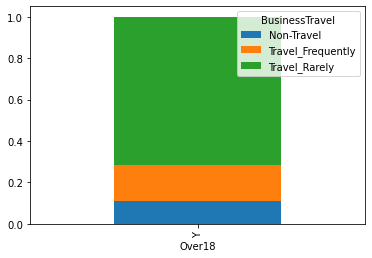

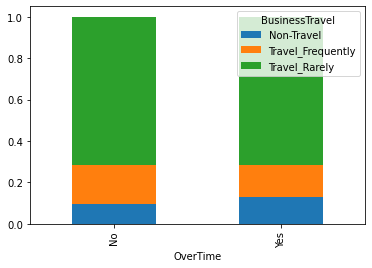

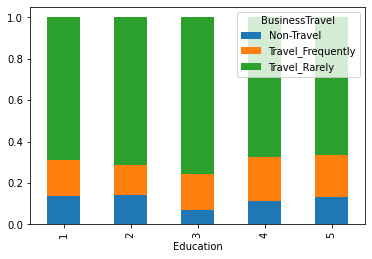

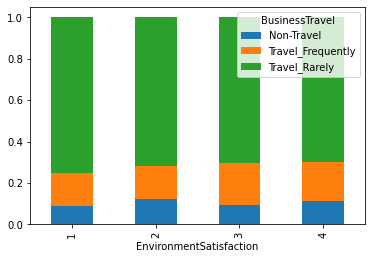

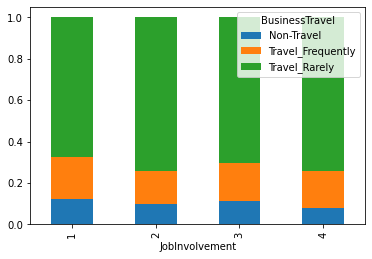

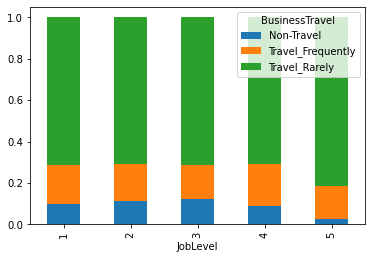

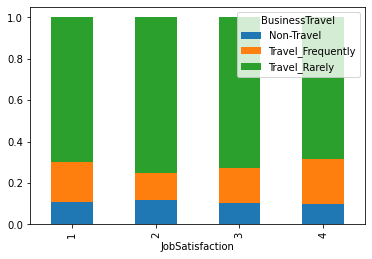

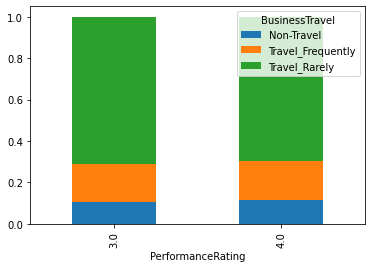

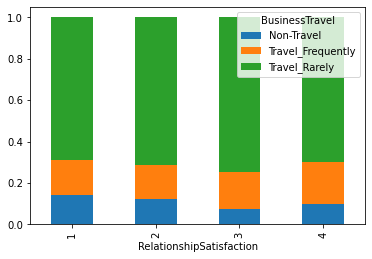

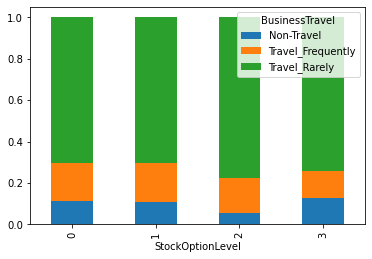

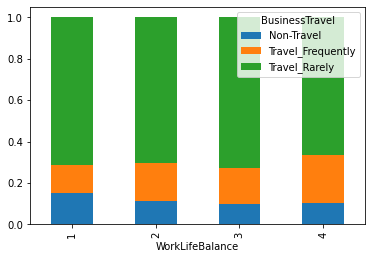

In [61]:
#Describe target variable (univariate & multivariate)
target_variable = 'BusinessTravel'
for _ in list(df_cat):
    ct = pd.crosstab(df.loc[:,_],df.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

In [62]:
bt_dic = df.BusinessTravel.value_counts(normalize=True).to_dict()
bt_dic

{'Travel_Rarely': 0.7146866230121609,
 'Travel_Frequently': 0.1796071094480823,
 'Non-Travel': 0.10570626753975679}

In [63]:
list(bt_dic.values())
list(bt_dic)

['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

In [64]:
def give_random():
    return random.choices(list(bt_dic),list(bt_dic.values()))[0]
give_random()

'Travel_Rarely'

In [65]:
df.loc[df.BusinessTravel.isnull(),'BusinessTravel'] = df.loc[df.BusinessTravel.isnull(),'BusinessTravel'].apply(lambda x: give_random())

In [ ]:
"""SCRIPT"""

bt_dic = df.BusinessTravel.value_counts(normalize=True).to_dict()
def give_random():
    return random.choices(list(bt_dic),list(bt_dic.values()))[0]
df.loc[df.BusinessTravel.isnull(),'BusinessTravel'] = df.loc[df.BusinessTravel.isnull(),'BusinessTravel'].apply(lambda x: give_random())

In [66]:
df.BusinessTravel.isnull().sum()

0

In [67]:
df.BusinessTravel.value_counts(normalize = True)

Travel_Rarely        0.720238
Travel_Frequently    0.176871
Non-Travel           0.102891
Name: BusinessTravel, dtype: float64

In [68]:
df_original.BusinessTravel.value_counts(normalize = True)

Travel_Rarely        0.714687
Travel_Frequently    0.179607
Non-Travel           0.105706
Name: BusinessTravel, dtype: float64

In [69]:
#cleaning PerformanceRating

In [70]:
df.PerformanceRating.value_counts(normalize=True)

3.0    0.847784
4.0    0.152216
Name: PerformanceRating, dtype: float64

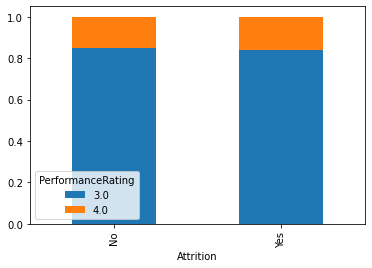

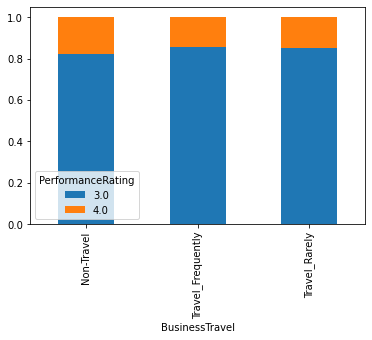

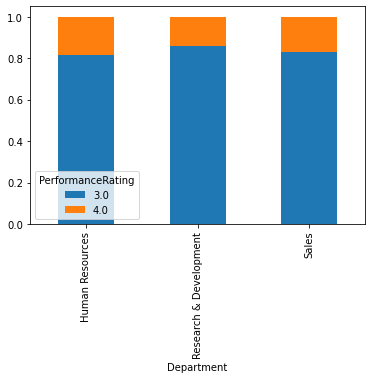

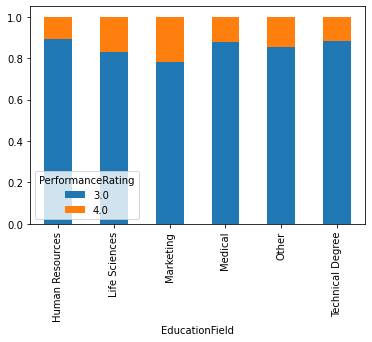

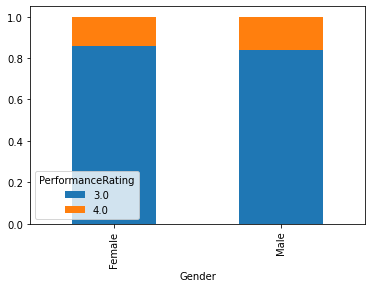

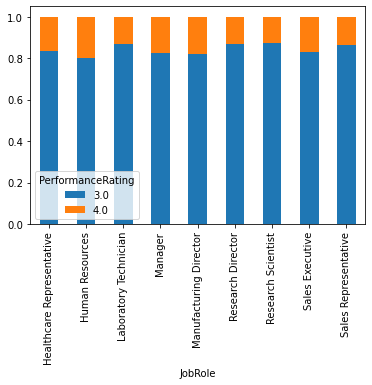

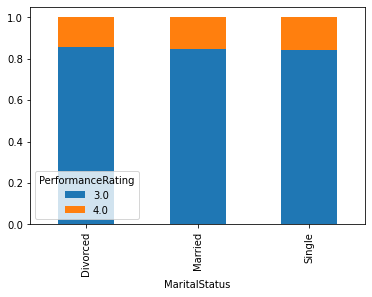

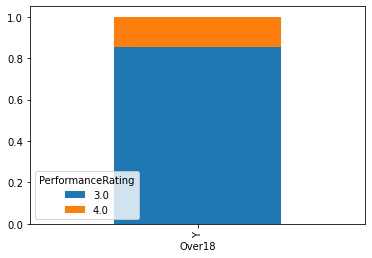

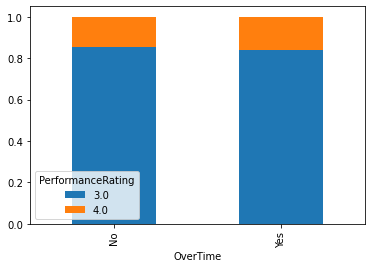

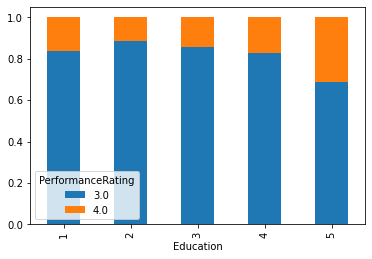

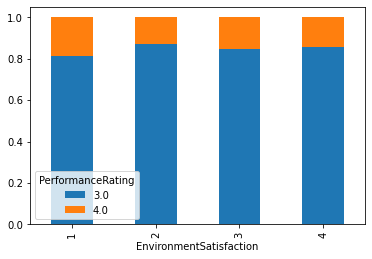

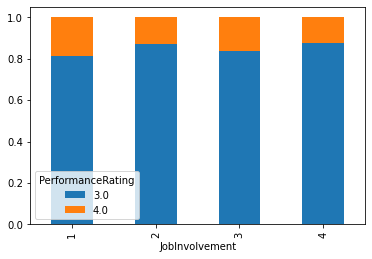

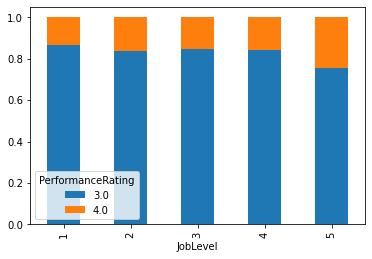

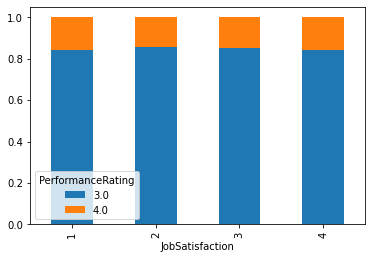

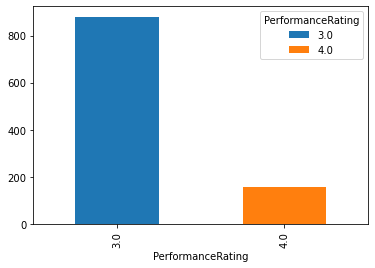

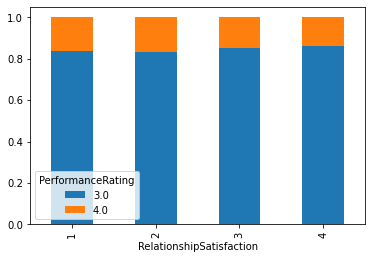

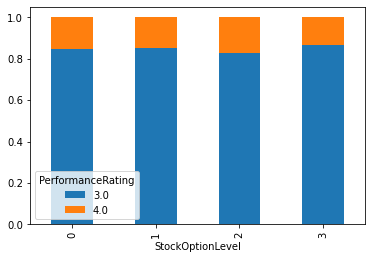

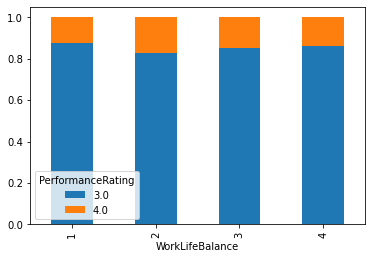

In [71]:
#Describe target variable (univariate & multivariate)
target_variable = 'PerformanceRating'
for _ in list(df_cat):
    ct = pd.crosstab(df.loc[:,_],df.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

In [72]:
df.groupby(['Education','JobLevel'])['PerformanceRating'].agg(pd.Series.mode)

Education  JobLevel
1          1           3.0
           2           3.0
           3           3.0
           4           3.0
           5           3.0
2          1           3.0
           2           3.0
           3           3.0
           4           3.0
           5           3.0
3          1           3.0
           2           3.0
           3           3.0
           4           3.0
           5           3.0
4          1           3.0
           2           3.0
           3           3.0
           4           3.0
           5           3.0
5          1           3.0
           2           3.0
           3           3.0
           4           4.0
           5           4.0
Name: PerformanceRating, dtype: float64

In [73]:
"""SCRIPT"""

df.loc[:,'PerformanceRating'] = df.groupby(['Education','JobLevel'])['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [74]:
df.PerformanceRating.isnull().sum()

0

In [75]:
df.PerformanceRating.value_counts(normalize=True)

3.0    0.864796
4.0    0.135204
Name: PerformanceRating, dtype: float64

In [77]:
df_original.PerformanceRating.value_counts(normalize=True)

3.0    0.847784
4.0    0.152216
Name: PerformanceRating, dtype: float64

In [78]:
#Cleaning Age

In [79]:
df.Age.describe()

count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

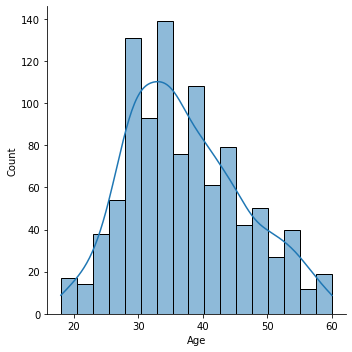

In [80]:
sns.displot(x='Age', data=df, kind='hist',kde=True)

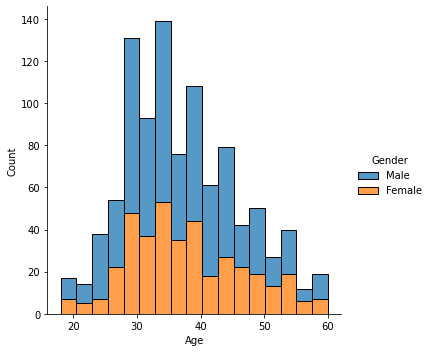

In [81]:
sns.displot(x='Age', data=df, kind='hist', hue='Gender', multiple='stack')

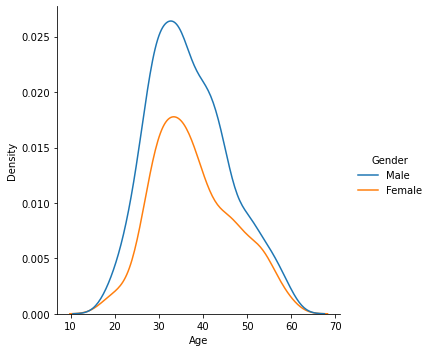

In [82]:
sns.displot(x='Age', data=df, kind='kde', hue='Gender')

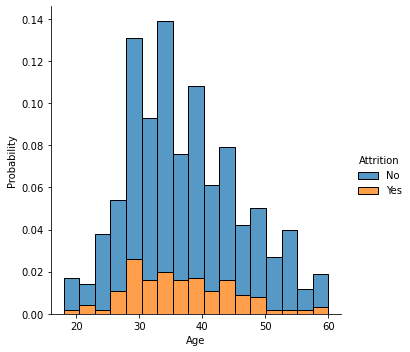

In [83]:
sns.displot(x = 'Age',data = df, hue='Attrition',multiple="stack", stat="probability")

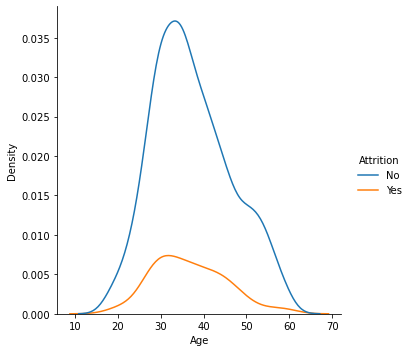

In [84]:
sns.displot(x='Age', data=df, kind='kde', hue='Attrition')

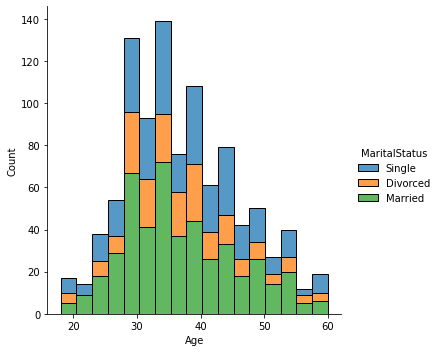

In [85]:
sns.displot(x = 'Age',data = df, hue='MaritalStatus',multiple="stack")

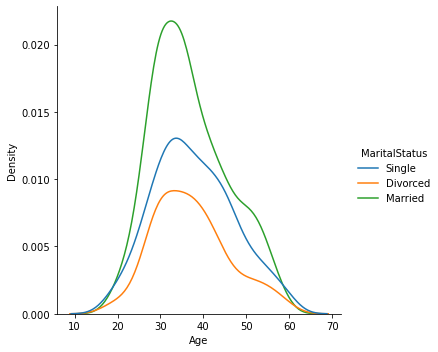

In [86]:
sns.displot(x='Age', data=df, kind='kde', hue='MaritalStatus')

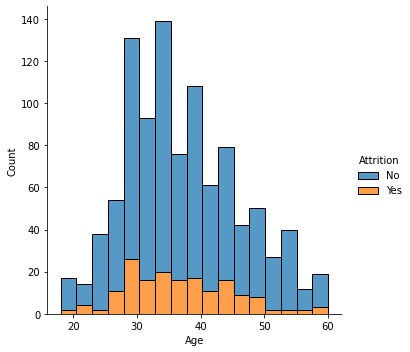

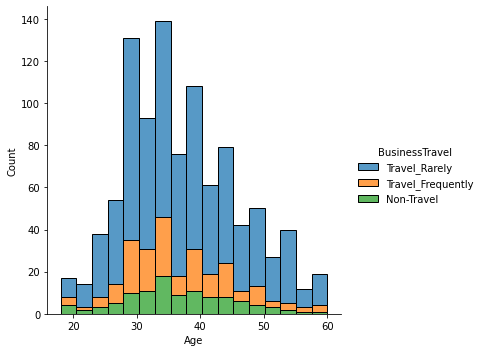

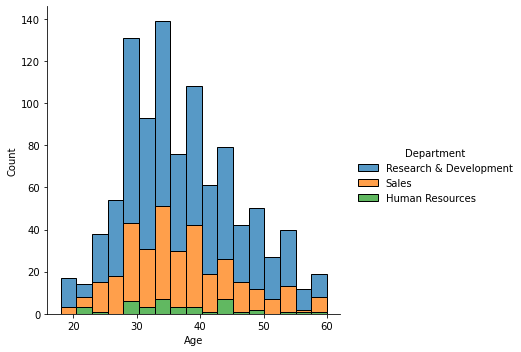

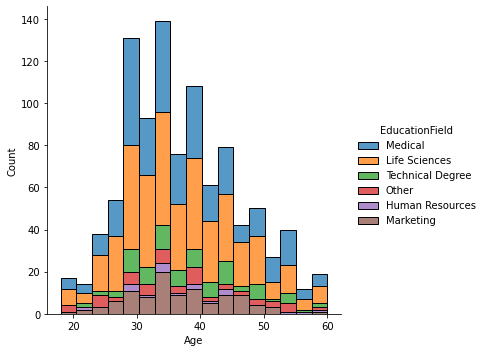

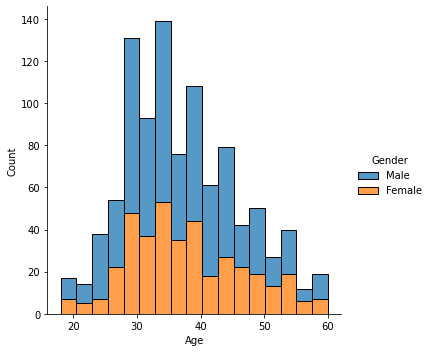

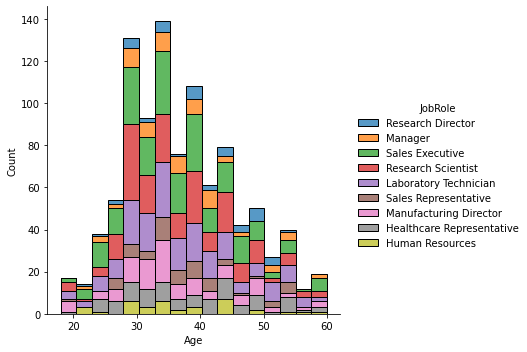

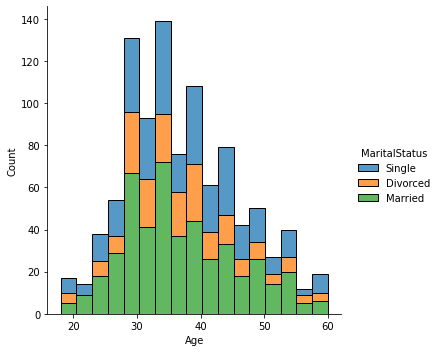

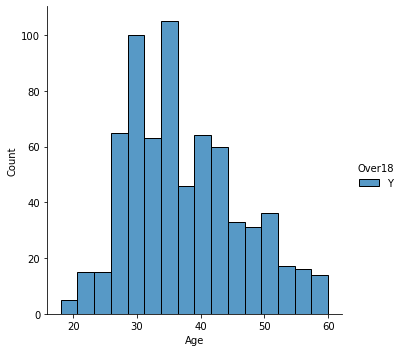

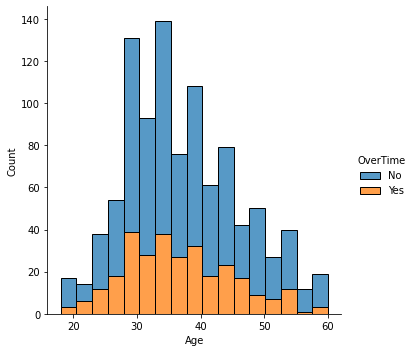

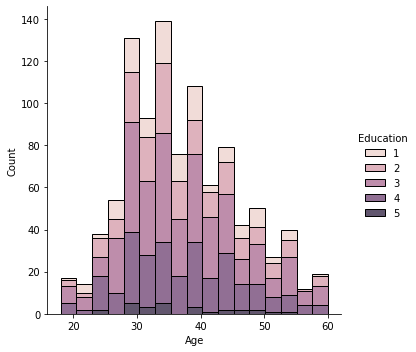

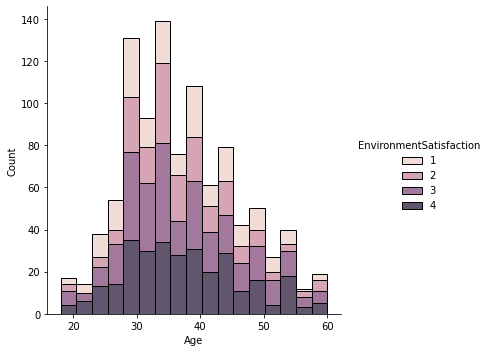

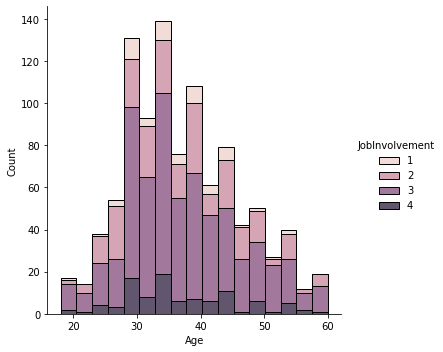

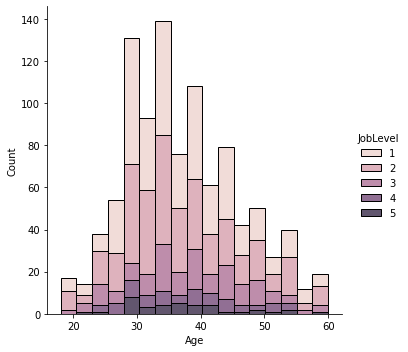

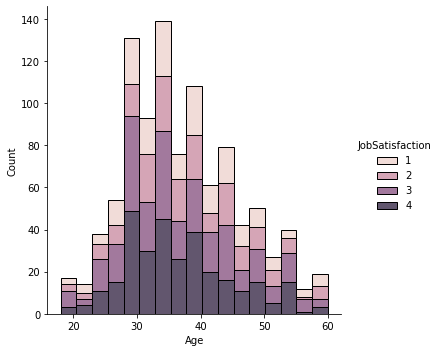

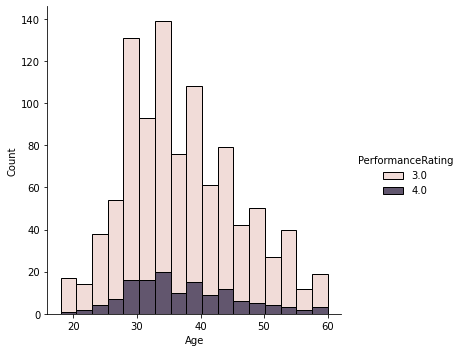

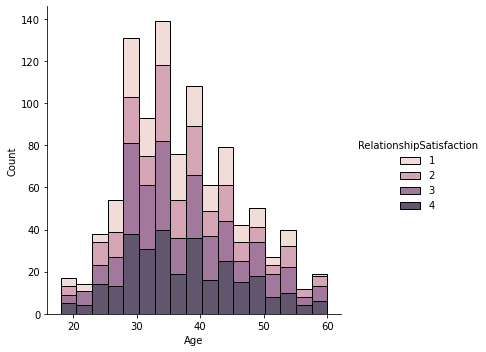

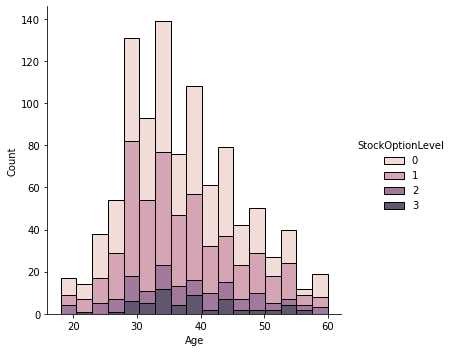

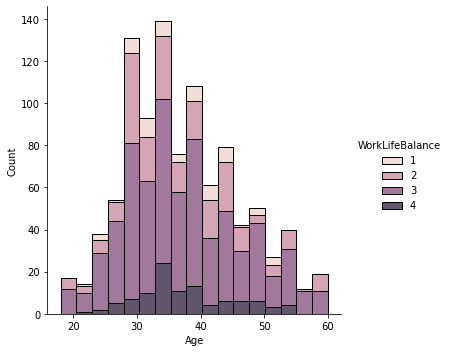

In [87]:
for variable in list(df_cat):
    sns.displot(x='Age', data=df, kind='hist', hue=variable, multiple='stack')

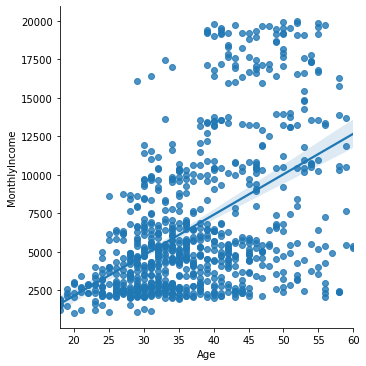

In [88]:
sns.lmplot(x = 'Age', y='MonthlyIncome', data = df)

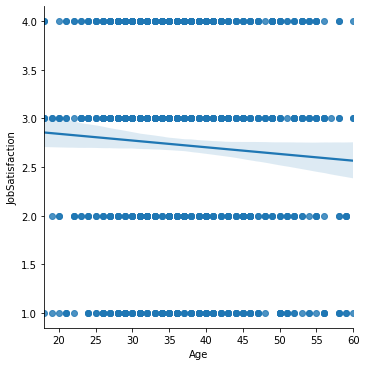

In [89]:
sns.lmplot(x = 'Age', y='JobSatisfaction', data = df)

In [90]:
df.groupby(['Gender','JobSatisfaction','EnvironmentSatisfaction','StockOptionLevel'])['Age'].mean()

Gender  JobSatisfaction  EnvironmentSatisfaction  StockOptionLevel
Female  1                1                        0                   37.142857
                                                  1                   34.200000
                         2                        0                   44.200000
                                                  1                   37.000000
                                                  2                   40.000000
                                                                        ...    
Male    4                3                        3                   33.000000
                         4                        0                   36.153846
                                                  1                   38.043478
                                                  2                   36.714286
                                                  3                   37.600000
Name: Age, Length: 122, dtype: float64

In [91]:
"""SCRIPT"""

df.loc[:,'Age']=df.groupby(['Gender','JobSatisfaction','EnvironmentSatisfaction','StockOptionLevel'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [92]:
df.loc[:,'Age'].isnull().sum()

1

In [93]:
df.loc[:,'Age'].fillna(df.Age.mean(), inplace=True)

In [94]:
df.loc[:,'Age'].isnull().sum()

0

In [95]:
df.Age.describe()

count    1176.000000
mean       37.167382
std         8.408802
min        18.000000
25%        31.000000
50%        36.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [97]:
df_original.Age.describe()

count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [98]:
#imputing MonthlyIncome

In [99]:
df.MonthlyIncome.describe()

count      963.000000
mean      6565.946002
std       4710.625603
min       1009.000000
25%       2969.000000
50%       4969.000000
75%       8585.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

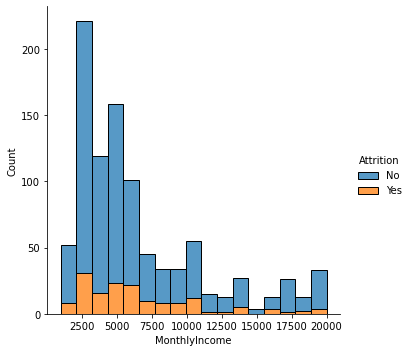

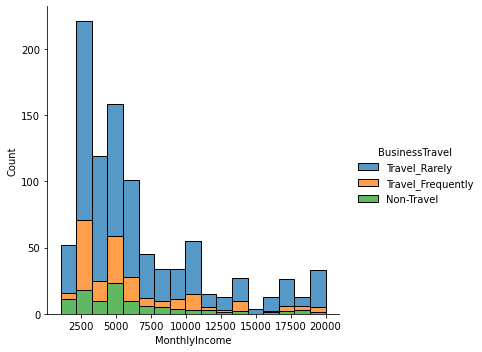

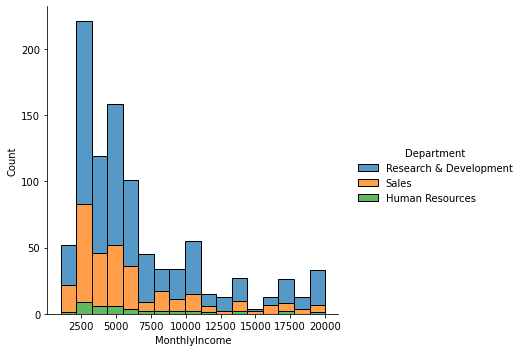

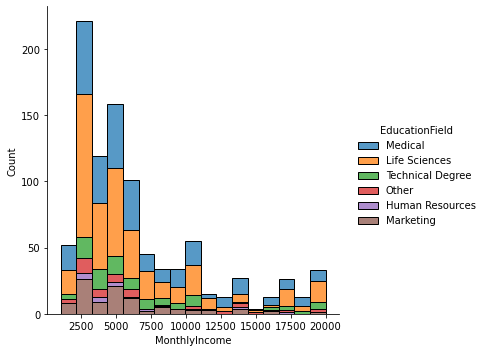

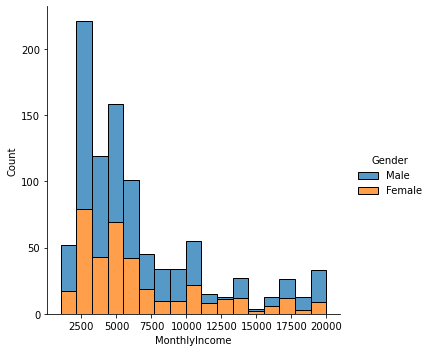

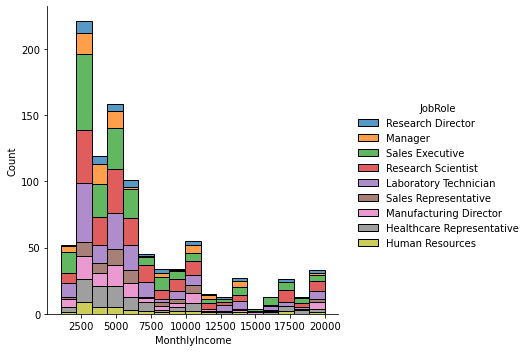

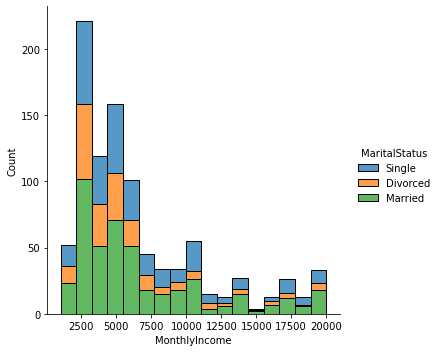

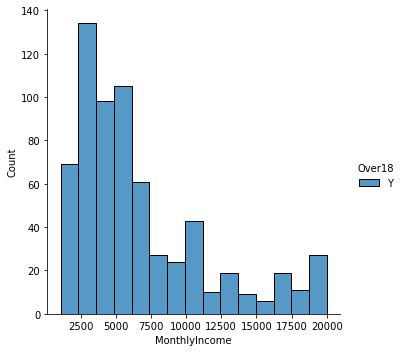

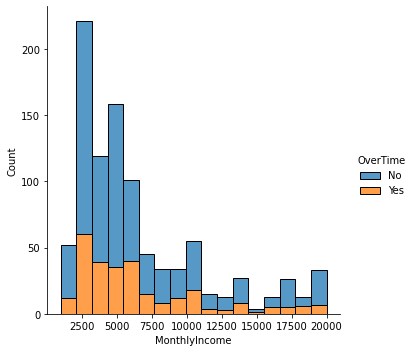

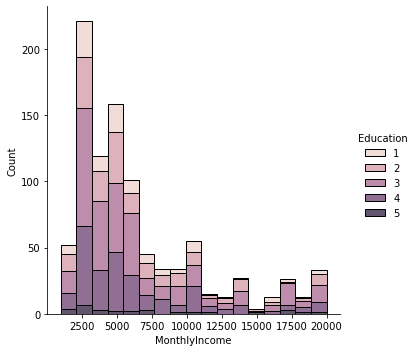

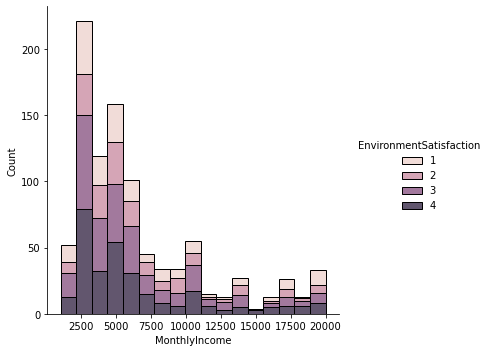

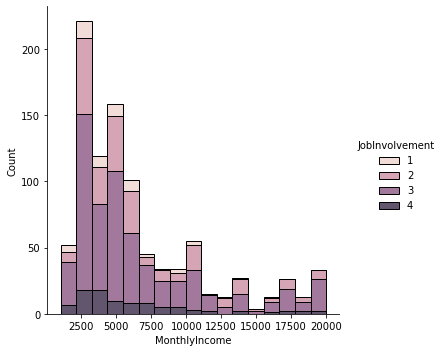

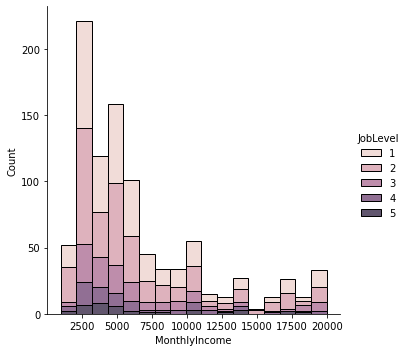

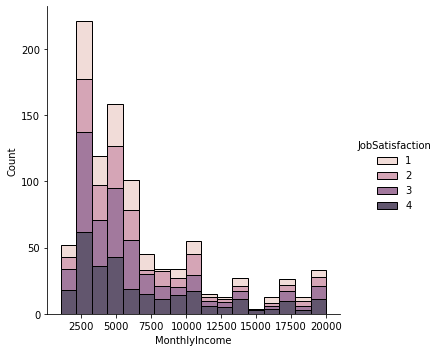

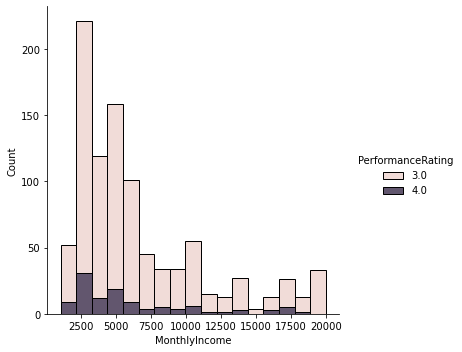

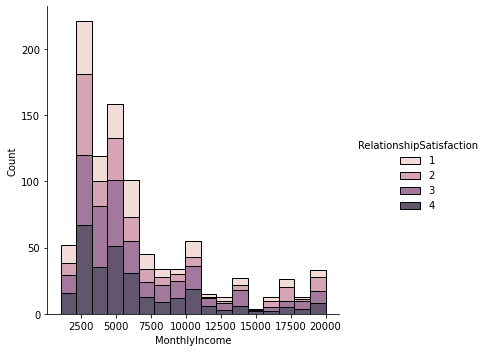

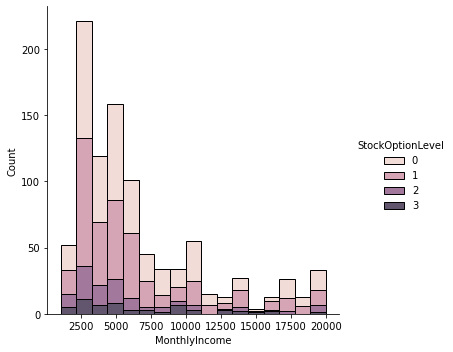

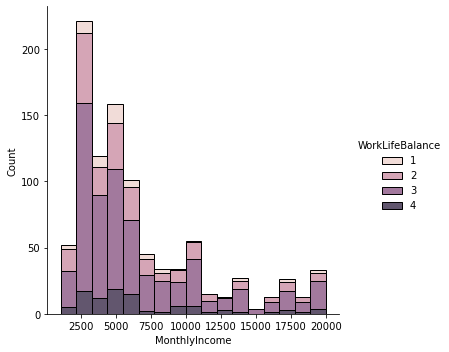

In [100]:
for variable in list(df_cat):
    sns.displot(x='MonthlyIncome', data=df, kind='hist', hue=variable, multiple='stack')

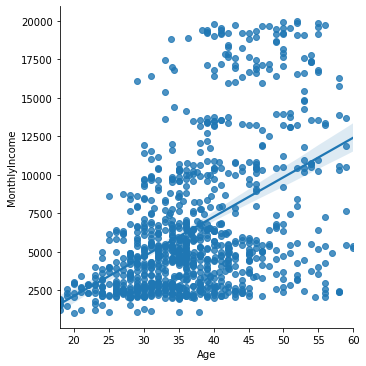

In [101]:
sns.lmplot(x='Age', y='MonthlyIncome', data = df)

In [102]:
df.loc[:,'Age_cat'] = pd.cut(df.Age,
                                bins=[17,25,35,45,55,60],
                                labels=['Very low','low','Medium','High','Very High'])

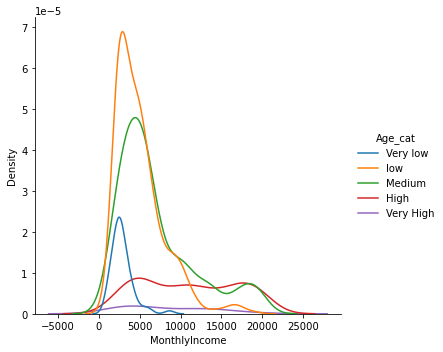

In [103]:
sns.displot(x='MonthlyIncome', kind='kde', data=df, hue='Age_cat')

In [104]:
df.groupby(['Gender', 'Age_cat'])['MonthlyIncome'].mean()

Gender  Age_cat  
Female  Very low      2727.470588
        low           5252.064286
        Medium        6505.739130
        High         10801.869565
        Very High     7555.700000
Male    Very low      2844.795455
        low           4891.831169
        Medium        7215.606195
        High         11115.750000
        Very High     8526.687500
Name: MonthlyIncome, dtype: float64

In [105]:
df.loc[:,'MonthlyIncome'] = df.groupby(['Gender', 'Age_cat'])['MonthlyIncome'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
"""SCRIPT"""

df.loc[:,'Age_cat'] = pd.cut(df.Age,
                                bins=[17,25,35,45,55,60],
                                labels=['Very low','low','Medium','High','Very High'])
df.loc[:,'MonthlyIncome'] = df.groupby(['Gender', 'Age_cat'])['MonthlyIncome'].apply(lambda x: x.fillna(x.mean()))

In [106]:
df.loc[:,'MonthlyIncome']

0        8446.0
1        4834.0
2        4768.0
3        2799.0
4        7978.0
         ...   
1171     2115.0
1172     5147.0
1173     2500.0
1174     4385.0
1175    17174.0
Name: MonthlyIncome, Length: 1176, dtype: float64

In [107]:
df.loc[:,'MonthlyIncome'].describe()

count     1176.000000
mean      6528.069097
std       4340.116814
min       1009.000000
25%       3407.750000
50%       5252.064286
75%       7574.775000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [111]:
df_original.loc[:,'MonthlyIncome'].describe()

count      963.000000
mean      6565.946002
std       4710.625603
min       1009.000000
25%       2969.000000
50%       4969.000000
75%       8585.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [112]:
#TrainingTimesLastYear

In [113]:
df.TrainingTimesLastYear.describe()

count    943.000000
mean       2.827147
std        1.273120
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: TrainingTimesLastYear, dtype: float64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

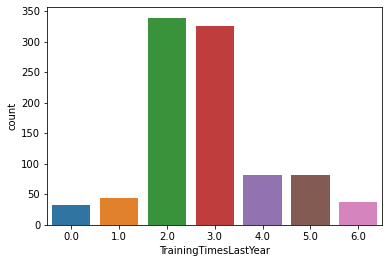

In [114]:
sns.countplot(x = 'TrainingTimesLastYear', data= df)

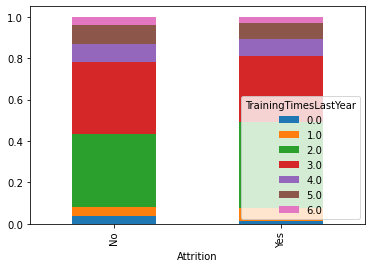

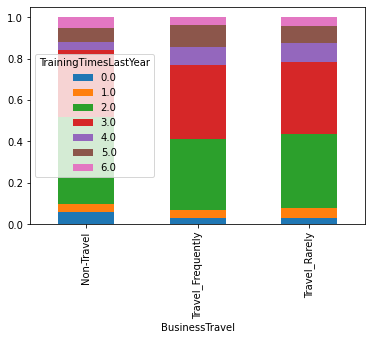

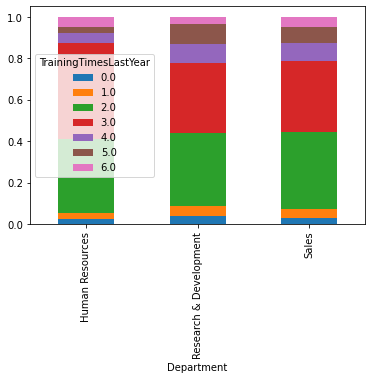

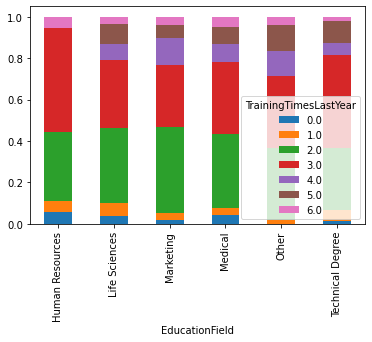

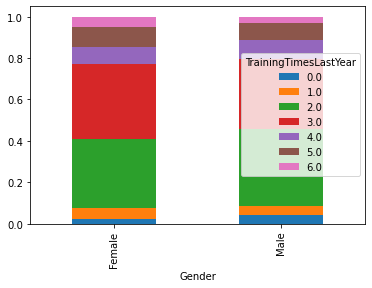

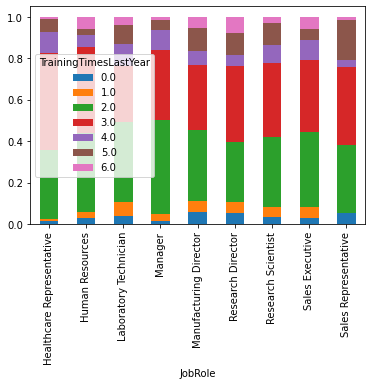

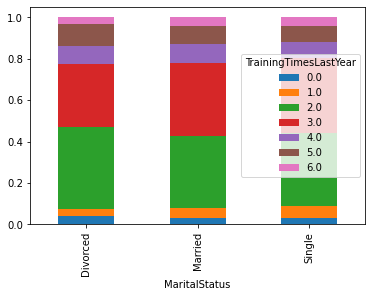

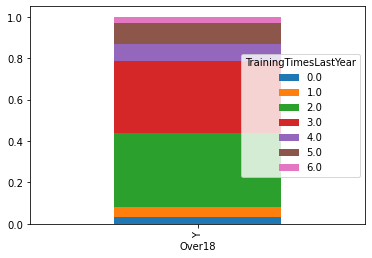

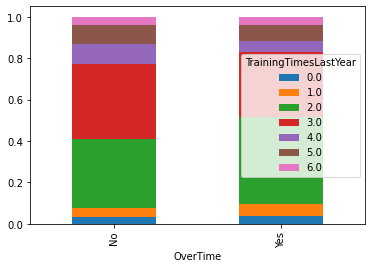

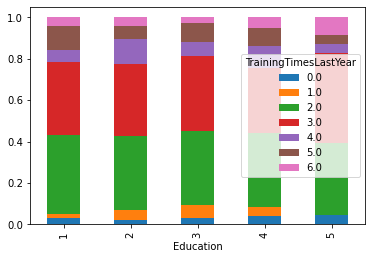

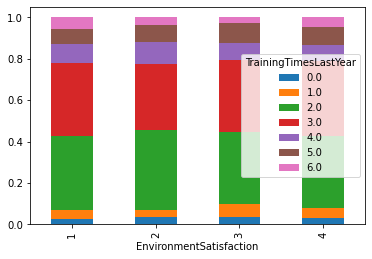

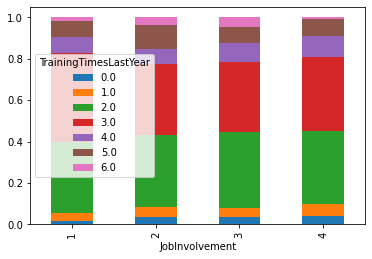

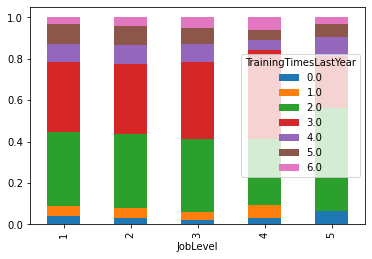

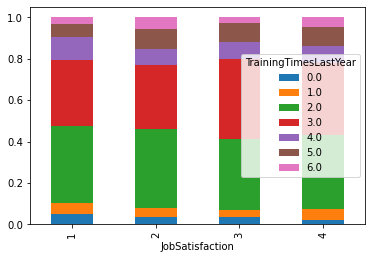

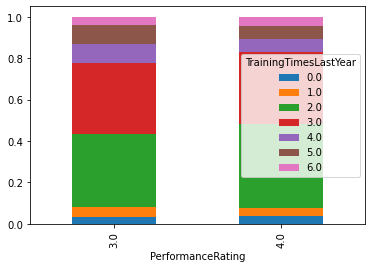

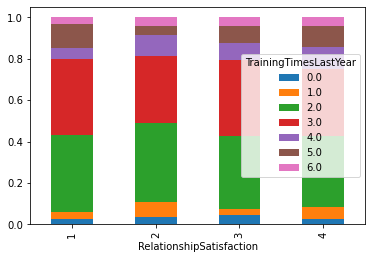

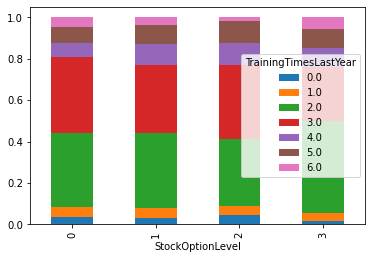

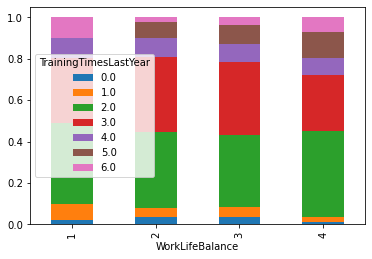

In [116]:
#Describe target variable (univariate & multivariate)
target_variable = 'TrainingTimesLastYear'
for _ in list(df_cat):
    ct = pd.crosstab(df.loc[:,_],df.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

In [80]:
df.TrainingTimesLastYear.isna().sum()

233

In [77]:
len(df)

1176

In [78]:
233/1176

0.19812925170068027

In [ ]:
"""SCRIPT"""

df.drop(columns = 'TrainingTimesLastYear', inplace = True)

In [ ]:
#####END####

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

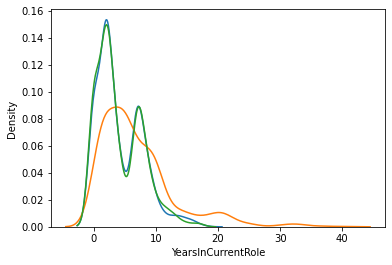

In [9]:
sns.kdeplot(df.YearsInCurrentRole)
sns.kdeplot(df.YearsAtCompany.dropna())
sns.kdeplot(df.YearsWithCurrManager)

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

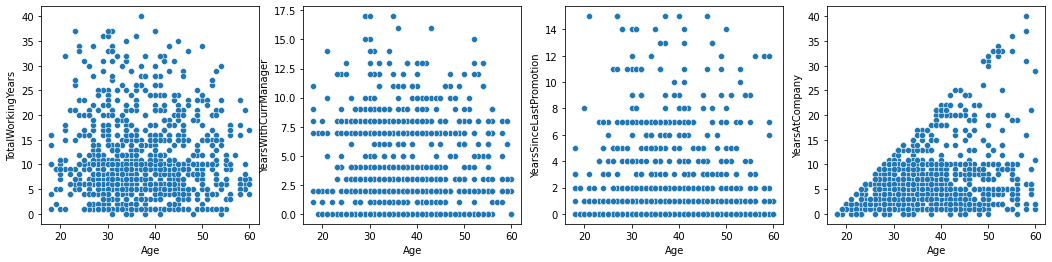

In [26]:
fig, axs = plt.subplots(1,4,figsize=(18,4))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df, ax = axs[0])
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df, ax = axs[1])
sns.scatterplot(x='Age', y='YearsSinceLastPromotion', data=df, ax = axs[2])
sns.scatterplot(x='Age', y='YearsAtCompany', data=df, ax = axs[3])

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

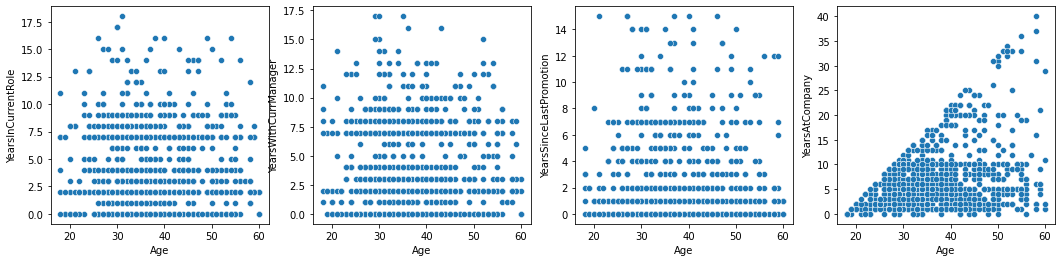

In [33]:
fig, axs = plt.subplots(1,4,figsize=(18,4))
sns.scatterplot(x='Age', y='YearsInCurrentRole', data=df, ax = axs[0])
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df, ax = axs[1])
sns.scatterplot(x='Age', y='YearsSinceLastPromotion', data=df, ax = axs[2])
sns.scatterplot(x='Age', y='YearsAtCompany', data=df, ax = axs[3])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Age'>

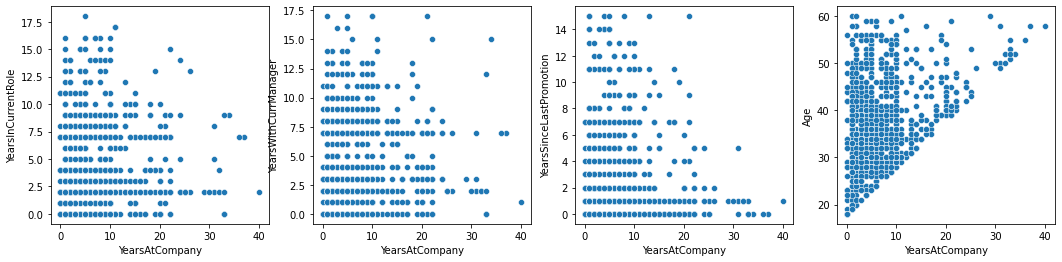

In [34]:
fig, axs = plt.subplots(1,4,figsize=(18,4))
sns.scatterplot(x='YearsAtCompany', y='YearsInCurrentRole', data=df, ax = axs[0])
sns.scatterplot(x='YearsAtCompany', y='YearsWithCurrManager', data=df, ax = axs[1])
sns.scatterplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=df, ax = axs[2])
sns.scatterplot(x='YearsAtCompany', y='Age', data=df, ax = axs[3])

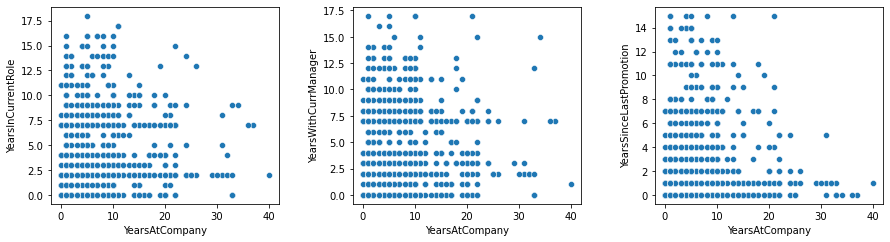

In [48]:
fig, axs = plt.subplots(1,3,figsize=(13,4))
fig.tight_layout(pad=3.0)
sns.scatterplot(x='YearsAtCompany', y='YearsInCurrentRole', data=df, ax = axs[0])
sns.scatterplot(x='YearsAtCompany', y='YearsWithCurrManager', data=df, ax = axs[1])
sns.scatterplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=df, ax = axs[2])


<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

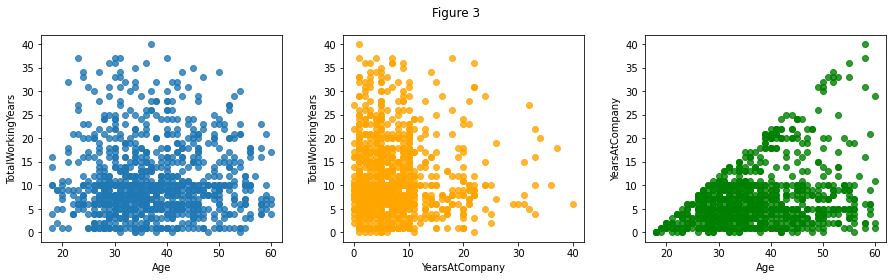

In [66]:
fig, axs = plt.subplots(1,3,figsize=(13,4))
fig.tight_layout(pad=3.0)
#fig.suptitle('Figure 3', fontsize=12)
sns.regplot(x='Age', y='TotalWorkingYears', data=df, ax=axs[0], fit_reg=False)
sns.regplot(x='YearsAtCompany', y='TotalWorkingYears', data=df, ax=axs[1], fit_reg=False, color = 'orange')
sns.regplot(x='Age',y='YearsAtCompany', data=df, ax=axs[2], fit_reg=False, color = 'green')

In [ ]:
fig, axes = plt.subplots(1,figsize = (12,2))
sns.lineplot(data = df1['YearsAtCompany']-df1['YearsWithCurrManager'], ax = axes)
axes.axhline(0,color='red',ls='--')

In [ ]:
df.loc[:,'d1'] = df.YearsAtCompany - df.YearsInCurrentRole
df.loc[:,'d2'] = df.YearsAtCompany - df.YearsSinceLastPromotion
df.loc[:,'d3'] = df.YearsAtCompany - df.YearsWithCurrManager

In [ ]:
df.loc[(df.d1<0) |(df.d2<0)| (df.d3<0)]

In [ ]:
429/len(df)

In [ ]:
fig, axes = plt.subplots(3,figsize = (12,6))
sns.lineplot(data = df1.delta_YearsWithCurrManager, ax = axes[0])
axes[0].axhline(0,color='red',ls='--')
sns.lineplot(data = df1.delta_YearsSinceLastPromotion, ax = axes[1])
axes[1].axhline(0,color='red',ls='--')
sns.lineplot(data = df1.delta_YearsInCurrentRole, ax = axes[2])
axes[2].axhline(0,color='red',ls='--')


In [70]:
df.groupby('StockOptionLevel').size()

StockOptionLevel
0    514
1    470
2    125
3     67
dtype: int64

In [71]:
df.StockOptionLevel.value_counts()

0    514
1    470
2    125
3     67
Name: StockOptionLevel, dtype: int64

In [75]:
(df.Attrition.value_counts()/df.Attrition.value_counts().sum())

No     0.836735
Yes    0.163265
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Attrition'>

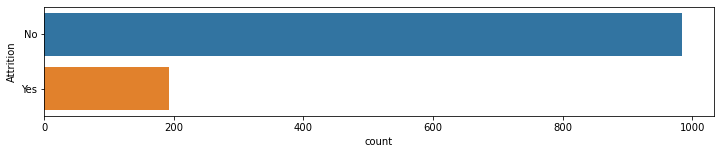

In [76]:
fig, ax = plt.subplots(figsize=(12,2))
sns.countplot(y = df.Attrition, ax=ax)